# Business Sales Transaction

### Itroducing

This project is designed for the research work of an online store. The framework of this project, as the main business issues, will be considered for a possible increase the income of the store, and an analysis of the data provided by the store will be carried out

#### Context

E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

#### Content
This is a sales transaction dataset of UK-based B2C e-commerce for one year. The organization sells gifts and homeware for adults and children primarily through a website since 2007. The customers are from all over the world and usually make a purchase directly for themselves. There are also small businesses that buy in bulk and sell to other customers through the retail outlet channel.
The dataset contains 500K rows and 9 columns. The following is the description of each column.

1. TransactionNo (nominal): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
2. Date (numeric): the date when each transaction was generated.
3. ProductNo (nominal): a five or six-digit unique character used to identify a specific product.
4. Product (nominal): product/item name.
5. Price (numeric): the price of each product per unit in pound sterling (£).
6. Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
7. Revenue: the amount of income generated by a transaction in pound sterling (£). Revenue is calculated from the price times quantity.
8. CustomerNo (nominal): a five-digit unique number that defines each customer.
9. Country (nominal): name of the country where the customer resides.


Dataset and content information taken from the site by Gabriel Ramos https://www.kaggle.com/gabrielramos87/an-online-shop-business

### Business problems and questions

The success of a business in a competitive environment depends on its ability to receive, store and use information. Data is one of the main sources of information. Therefore, data analysis is an important activity for obtaining new and useful information. To help the organization build a more transparent business, analyze and structure existing transactions, we need to analyze it using Python. Python tools will help quickly and efficiently summarize key insights from data of any size, deduce patterns, and answer meaningful questions. In this project, we will consider the answers to the following questions of the organization:

1. Create a search engine for quick and easy search of the main indicators in the data (minimum, maximum, choosen transactions, etc.)
2. How was the sales trend over the periods?
3. Which counrties most profitable 
4. Which products most profitable and most purchased
5. The most profitable customers
6. Recommendations to the business to gain more profit

## 1. Exploratory Data Analysis

## Import required libraries

To start this analysis, first import the libraries to be able to call functions that needed for this prject

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

### 1.1. Import data and describing some general details about observing data

To start the analysis, we need to upload the Data Frame into a variable called **df** and visualize the header and the first five lines of dataset for a more visual display. The dataset is loaded in Jupiter notebook in the same folder with this project and has the format "csv"

The most used for dataset analysing is Pandas library. Pandas has provide some of advantages, such as:
- It can present data in a way that is suitable for data analysis
- The package contains multiple methods for convenient data filtering
- Pandas has a variety of utilities to perform Input/Output operations in a seamless manner. It can read data from a variety of formats such as CSV, TSV, MS Excel, etc.

Some definitions and information taken from the website https://stackabuse.com/beginners-tutorial-on-the-pandas-python-library/ by Stack Abuse

In [29]:
df = pd.read_csv("Business Sales Transaction.csv")
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
0,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom
1,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom
2,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom
3,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,71.64,13069.0,United Kingdom
4,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,255.60,13069.0,United Kingdom


First of all unload details about numbers of rows and columns in dataset, using **.shape** method

In [30]:
df.shape

(536350, 9)

The method used helped to achive that in this dataset there are 9 columns and 536350 rows (transactions) 

In next step extract information about names of each column of header, using **.columns** method. 

In [31]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'Revenue', 'CustomerNo', 'Country'],
      dtype='object')

Look at the number of knikal values in each column using method nunique()

In [70]:
df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              512
Quantity           510
Revenue           6452
CustomerNo        4738
Country             38
dtype: int64

Different number of unique values in row "TransactionNo" with the number of rows looks unnatural. Maybe there are duplicates, check it out using method duplicated(). This issue will be addressed later in the project.

In [71]:
df.duplicated().sum()

5433

Indeed found duplicates in rows. So they will need to be checked and removed if needed. Working with duplicates will be considered in further parts of this project

For a complete analysis, it is necessary to determine the start date and end date of the dataset

In [163]:
df2 = df.agg(Start_Date=('Date', np.min), End_Date=('Date', np.max))  
df2

,Date
Start_Date,2018-12-01
End_Date,2019-12-09


The dataset contains the transaction details, each of them characterized by 9 labeled variables. In total 536350 transactions are provided in the dataset. 
Data collected from 2018-12-01 and 2019-12-09 (a little over a year)

### 1.2. Dataset details

For quick view to structure of data frame including datatypes detailes use **.info( )** function

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   Revenue        536350 non-null  float64
 7   CustomerNo     536295 non-null  float64
 8   Country        536350 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 36.8+ MB


The info() method prints details about the our dataset. This info contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (including non-null values).

In information above clearly seen that in column "CustomerNo" we have an issue - the number of Non-Null vales different from other data. More detailed work with this shortcoming is described and carried out in the following parts of project.

In the table above it is clearly seen that we have 3 float, 1 integer and 5 object data types

Let's look to more detailed information about main elements in dataset, such as *Price, Quantity and Revenue*. 
These elements was choosen for detailed view becouse they have direct impact for financial questions

For describing choosen elements we use **.describe ()** function

In [74]:
df [['Price', 'Quantity', 'Revenue']].describe().round(2)

,Price,Quantity,Revenue
count,536350.00,536350.00,536350.00
mean,13.61,9.92,120.36
std,4.60,216.66,2574.80
min,10.25,-80995.00,-1002718.10
25%,11.53,1.00,18.75
50%,12.38,3.00,46.04
75%,14.48,10.00,127.80
max,675.99,80995.00,1002718.10


Function .describe() is used to view some general statistical information (percentile, mean, max, min, std, etc.). Here included only finantial information and information, which can give some statistic picture (Price, Quantity, Revenue). We have rounded the numbers to two decimal places to make them more readable

In the resulting statistics, need to pay attention to next insights:

1. Information about Price of products for one transaction:
- min price is 10,25
- max price is 675,9
- mean price is 13,6

2. Information about Quantity of products for one transaction:
- min Quantity **has an issue** because the value is negative (-80995). This is an obvious mistake, so we will need to clean the data in this column and remove negative values, because negative values related to cancelled transactions. Data cleaning will be carried out in the next parts of this project
- max Quantity is 80995
- mean Quantity is 9,91

3. Information about Revenue:
- min Revenue has the same issue as a Quantity, because Revenue is calculated from the price times quantity.
- max Revenue is 1002718.10
- mean Revenue is 120,36


## 2. A data preprocessing

### 2.1. Dublicate values

In the previous sections, 5396 duplicate transactions were identified. To fully understand their essence, we need to look at them in more detail. Let's look into 10 of it 

In [75]:
df[df.duplicated()].head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
319,581514,12/9/2019,22075,6 Ribbons Elegant Christmas,10.65,24,255.60,17754.0,United Kingdom
363,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,11.53,1,11.53,14446.0,United Kingdom
383,581538,12/9/2019,22068,Black Pirate Treasure Chest,10.65,1,10.65,14446.0,United Kingdom
397,581538,12/9/2019,23318,Box Of 6 Mini Vintage Crackers,12.80,1,12.80,14446.0,United Kingdom
400,581538,12/9/2019,22992,Revolver Wooden Ruler,12.25,1,12.25,14446.0,United Kingdom
407,581538,12/9/2019,22694,Wicker Star,12.40,1,12.40,14446.0,United Kingdom
409,581538,12/9/2019,23343,Jumbo Bag Vintage Christmas,12.38,1,12.38,14446.0,United Kingdom
1834,581237,12/8/2019,23498,Classic Bicycle Clips,11.74,1,11.74,15443.0,United Kingdom
1838,581237,12/8/2019,23497,Classic Chrome Bicycle Bell,11.74,1,11.74,15443.0,United Kingdom
1840,581237,12/8/2019,23509,Mini Playing Cards Fun Fair,10.68,2,21.36,15443.0,United Kingdom


A more detailed examination showed that there are no duplicate transactions. All transactions are correct. This is due to the fact that several different goods were purchased for the same transaction. There is no need to remove duplicates. Leave as is

### 2.2. Find and remove missing values

First of all it is nessesary to indicate number of null data

In [76]:
df.isnull().sum().sum()

55

307 data gaps detected. It is necessary to consider in which columns such omissions are allowed for further processing and more correct analysis

In [10]:
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
Revenue           0
CustomerNo       55
Country           0
dtype: int64

As previously noted in column "CustomerNo" there are incorrect data, which has now been proven once again. Now we need to see in more details to this invalid data from the table  

In [78]:
df[df['CustomerNo'].isnull()].head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
6543,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-240,-2460.00,NaN,United Kingdom
6544,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-300,-3075.00,NaN,United Kingdom
94145,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,-44.25,NaN,United Kingdom
105033,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,-25.37,NaN,United Kingdom
117279,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,-14.50,NaN,United Kingdom
165859,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,-21.47,NaN,United Kingdom
192285,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,-27.62,NaN,United Kingdom
192286,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,-143.28,NaN,United Kingdom
242409,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,-1640.00,NaN,United Kingdom
242410,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,-2255.00,NaN,United Kingdom


The detailed table with incorrect data above shows that these are the failed transactions for which negative values were previously mentioned in the fields 'Quantity' and 'Revenue'. To clear the data, delete it using method dropna()

In [32]:
df = df.dropna() 

Removal process completed

### 2.3. Removing negative values (canceled transactions)

To remove negative data from the dataset (which represent canceled transactions), we use the function, which in the 'Quantity' column will leave only values, greater than zero

In [33]:
df = df[(df['Quantity']>0)]

The process of cleaning the data is completed, check again the detailed description

In [34]:
df [['Price', 'Quantity', 'Revenue']].describe().round(2)

,Price,Quantity,Revenue
count,527764.00,527764.00,527764.00
mean,13.59,10.59,128.51
std,4.48,156.79,1861.19
min,10.25,1.00,10.25
25%,11.53,1.00,20.45
50%,12.38,3.00,46.64
75%,14.48,11.00,128.16
max,675.99,80995.00,1002718.10


The updated description shows that there are no negative values, now in general the main indicators have improved

Data cleaning process completed

## 3. Business questions solution

### 3.1. Create a search engine for quick and easy search of the main indicators in the data (minimum, maximum, choosen transactions, etc.)

### 3.1.1. The search for the needed transaction 

Configured to search for a transaction by the number specified by the user. Method  **.loc** displays the entire line for the requested transaction

In [8]:
input_by_id_number = int(input("Enter id number of transaction: "))
df.loc [[input_by_id_number]]

Enter id number of transaction: 45


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
45,581476,12/9/2019,22114,Hot Water Bottle Tea And Sympathy,14.61,8,116.88,12433.0,Norway


The implemented search engine will help the organization to quickly search for the details of any transaction if necessary (to cancel the transaction of issuing, a duplicate receipt, providing information to the buyer, etc.)

### 3.1.2. The search for specific indicators of _numeric_ elements

At the end of each reporting period, it is important for the organization to receive information on the total amount of income, the most expensive product / quantity of goods sold and another details of transactions. To simplify the search for such information, a search engine has been implemented.

At the request of the user, this search engine provides information about any choosen columns:
- MINIMUM
- MAXIMUM
- TOTAL

In [7]:
input_by_request_data = input("Enter request (min, max, total): ")

for i in df:
    i = input("Enter column name: ")
    if input_by_request_data == "min":
        print("MINIMUM of", i, "column: ", df[i].min())
        break
    if input_by_request_data == "max":
        print("MAXIMUM of", i, "column: ", df[i].max())
        break
    if input_by_request_data == "total":
        print("TOTAL", i, "column: ", df[i].sum())
        break
else:
    print("Please, enter min, max or total")

Enter request (min, max, total): max
Enter column name: Price
MAXIMUM of Price column:  675.99


A convenient and versatile search engine for the main parameters of the dataset is ready. 
This search engine will be very convenient for the organization to find important points in a dataset of any size

## 3.2. How was the sales trend over the periods?

 To analyze the sales trend through the periods, we need to prepare the data, namely, add a new columns in which the operation was carried out and further group by this attribute. Considering that dates in data frame are presented in the format of one day (dd/m/yyyy) and in this format the analysis will be too narrow, we add columns to the table "Month", "Year" 

In order to identify the month and year, we use class **pandas.DatetimeIndex** with attributes:
- "year" The year of the datetime.
- "month" The month as January=1, December=12.


In [35]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
0,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom,2019,12
1,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom,2019,12
2,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom,2019,12
3,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,71.64,13069.0,United Kingdom,2019,12
4,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,255.60,13069.0,United Kingdom,2019,12


After columns was added, we can start grouping for trend analysis. We will consider the trend only in the context of months, since the analysis for the year will be indicative. Given that the number of months in each year in the dataset is different (in 2018 - 1 month and in 2019 - 9 months), it makes no sense to compare absolute values. Therefore, further data are considered in the context of each month, which is more informative

For clarity, sort the data in descending order using **sort_values ()** function

In [109]:
df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)

Month
11    9317838.14
12    8314954.49
10    7500723.46
9     6897918.02
8     5067881.74
7     4811850.13
5     4810804.49
6     4747034.87
1     4657511.78
3     4582609.99
4     3689631.75
2     3423796.63
Name: Revenue, dtype: float64

For a visual comparison of transactions carried out in different mounth, a bar chart has been formed, where it is clearly seen that the number of transactions have a natural tendency.   

**seaborn.countplot** class was chosen for visualization with parameter 'Mounth'
It shows the counts of observations in each categorical bin using bars.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Sales')

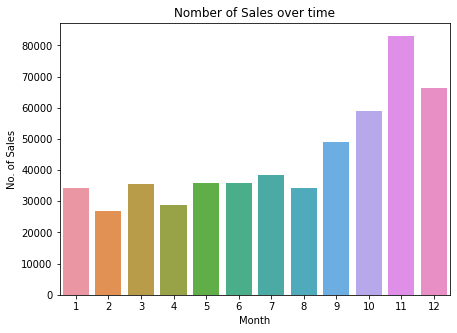

In [132]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Month'])
plt.title('Nomber of Sales over time')
plt.xlabel('Month')
plt.ylabel('No. of Sales')

Considering this diagram, it is obvious that the months during which the largest number of transactions occur are October November and December.

It is obvious that it is interesting and useful for a organization to know in what months and in what periods the largest number of transactions that bring more income take place in his store. When visualizing such data, it is easy to isolate patterns that will help organize the sales process in the most profitable and optimal way. 
Such analysis should be carried out constantly in order to timely respond to changes in customer demand and implement more profitable campaigns

### 3.3. Which counrties most profitable 

Also, in order to build a more profitable strategy, the organization needs to analyze the segments of the countries that use his services. In this case, consider which of the countries bring more income and which less.

To begin with, we will determine the top 10 countries that brought **the largest income**

In [115]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    56763395.37
Netherlands        2349627.29
EIRE               1782497.93
Germany            1454886.80
France             1432751.97
Australia          1024120.47
Sweden              404907.47
Switzerland         373646.10
Japan               305496.83
Spain               286474.83
Name: Revenue, dtype: float64

The largest revenue comes from buyers in the United Kingdom and it ie equeal to 91% of 

Next step, we will determine the top 10 countries that brought **the lowest income**

In [113]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).tail(10)

Country
United Arab Emirates    11966.26
Greece                  11066.25
Lithuania                8188.08
Czech Republic           7674.44
European Community       6210.23
Lebanon                  5692.32
Brazil                   4771.67
RSA                      4624.63
Bahrain                  3226.86
Saudi Arabia              969.50
Name: Revenue, dtype: float64

The country that received the least income Saudi Arabia. The organization needs to consider the costs of shipping goods to the top 10 countries with the lowest income in order to calculate the profitability and further make a decision

According to the results of this grouping, we have a clear list of countries that bring the highest and lowest income to the company. This information is extremely useful for the organization managing the company. The benefit of this grouping is that organization can see customer segments and plan sales in a more efficient way.

### 3.4. Which products most profitable and most purchased

One of the most important aspects of any store's transaction analysis is the analysis of the purchase of goods. In this section, we will take a closer look at the products that bring the most profit and immediately compare this information with the products that are bought most often.

For taking closer look for this information we create two new tabeles, one for most profitable goods, and another for most often buying. Then, to combine the result, we will create a common table using the method **merge()**

In [22]:
df_max_revenue = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(12)
df_max_quantity = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(12)
pd.merge(df_max_revenue, df_max_quantity, on=['ProductName'])

,Revenue,Quantity
ProductName,,
Popcorn Holder,630930.36,56450
Jumbo Bag Red Retrospot,580004.88,47363
World War 2 Gliders Asstd Designs,566033.00,53847
Cream Hanging Heart T-Light Holder,464857.90,35378
Assorted Colour Bird Ornament,434105.02,36445
Pack Of 72 Retrospot Cake Cases,392984.52,36231
Rabbit Night Light,382773.84,30680
Mini Paint Set Vintage,288238.86,26437
Victorian Glass Hanging T-Light,277875.32,23854


As a result table with most profitable and most purchased products was created. This table shows top10 of this kind of goods. 

Top3 of it:
1. Popcorn Holder
2. Jumbo Bag Red Retrospot
3. World War 2 Gliders Asstd Designs

We recommend that the store pay attention to this list of products, as they bring the store the most income. Further development of a sales strategy requires additional data on the costs incurred by the store for maintenance, purchase, costs for these products.

### 3.5. The most profitable customers  

One of the most important analyzes in an online store is the analysis of customer segments. By identifying different segments of customers, the store owner can clearly understand who is a regular customer, who is random, who brings the most profit, who conducts more/less transactions, and so on.

In this example, we will make a table in which there will be information on the top 10 clients in the context:
- the total amount of profit received at the expense of this buyer
- how many days ago he showed the last activity (to understand whether he is an active client or not)
- total number of transactions

Such a detailed study of customers will help the store build a strategy for a personal approach to customers in order to maximize profits

Considering that we plan to indicate the prescription of the last activity in the process of analyzing customers, we need to set today's date (starting point). Set the date to 20.12.2019 as it is the closest date to the end date in the dataset. Put it in a variable named "NOW" 

In [24]:
NOW = datetime.datetime(2019,12,20)
df['Date'] = pd.to_datetime(df['Date'])

Create a new table in the variable "Segment_Table". In this table we will group buyers in the context of the total income received from them. In order to see the top 10 customers from which the store received the maximum income, you need to group in descending order

In [26]:
df_segment_table = df.groupby('CustomerNo').agg({'Date': lambda x: (NOW - x.max()).days, 'TransactionNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
df_segment_table.rename(columns={'Date': 'Recency', 
                              'TransactionNo': 'Transaction_numbers', 
                              'Revenue': 'Paid_value'}, inplace=True)
df_segment_table.sort_values('Paid_value', ascending=False).head(10)

,Recency,Transaction_numbers,Paid_value
CustomerNo,,,
14646.0,12,2066,2306444.45
18102.0,11,431,923371.34
14911.0,12,5800,921661.03
12415.0,35,776,918473.44
17450.0,19,340,902191.13
17511.0,13,1074,736229.37
13694.0,14,804,705672.20
14156.0,20,1404,700648.66
14298.0,14,1640,646869.19


As a result, we got a table grouped by the highest profit received from the top 10 buyers. Additionally, we can display details for any of the buyers to look at their activity and see what products they purchase. Below are the details of the buyer who brought the store the most revenue (number # 14646)

In [27]:
best_client = df[df['CustomerNo'] == 14646.0]
best_client.sort_values('Revenue', ascending=False)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country
117692,573003,2019-10-27,23084,Rabbit Night Light,12.38,2400,29712.00,14646.0,Netherlands
131151,572052,2019-10-20,22595,Gingham Heart Decoration,10.99,1728,18990.72,14646.0,Netherlands
8347,581175,2019-12-07,23084,Rabbit Night Light,12.08,1440,17395.20,14646.0,Netherlands
472948,541570,2019-01-19,21212,Pack Of 72 Retrospot Cake Cases,10.68,1440,15379.20,14646.0,Netherlands
350342,552883,2019-05-12,21212,Pack Of 72 Retrospot Cake Cases,10.68,1200,12816.00,14646.0,Netherlands
...,...,...,...,...,...,...,...,...,...
106260,574059,2019-11-02,23551,Pack Of 12 Paisley Park Tissues,10.65,1,10.65,14646.0,Netherlands
106259,574059,2019-11-02,23380,Pack Of 12 Vintage Doily Tissues,10.65,1,10.65,14646.0,Netherlands
106258,574059,2019-11-02,21981,Pack Of 12 Woodland Tissues,10.65,1,10.65,14646.0,Netherlands
220469,C564899,2019-08-31,21787,Rain Poncho Retrospot,10.92,-144,-1572.48,14646.0,Netherlands


Consider the characteristics of the best client:
- Customer # 14646 brought the store the highest income which is equal to 2309766.53
- This Customer from Netherlands
- Last activity was fixed 12 days ago, which is acceptable result in compairing whis others clients
- Total 2064 transactions


Recommendation this segment of customer:

1. Offer promotions/gifts on all types of goods
2. Offer a discount for regular customers

Customer # 16446.0 brought the store the highest income for the entire period under review, he/she made a one-time purchase for a huge number (80 005) of units. 

*Recommendation* is to return the customer as follows: 
1. Offer a promotion on all types of goods,which are identical to the product "Paper Craft Little Birdie" 
2. Concidering that he/she made a purchase in September, additionally in August and September, remind him of promotions and discounts for him
3. Pay attention on Customer # 12415.0, because he/she made last transaction more than one month ago, it seems that he/she can leave this shop

## Recommendations for a profitable business

Within the framework of this project, several tools were prepared to analyze the available data and simplify the work of the organization, including:

- Created a search engine for quick and easy search of the main indicators in the data (minimum, maximum, choosen transactions, etc.)
- Studied trends of the sales trend over the periods
- Most profitable counrties identified
- Most profitable and most purchased products
- Most profitable customers identified

Recommendations to the business to gain more profit:

Еhe main insights in the study of this volume of operations was following information:
1. On the main trends in the context of months, where certain patterns can be traced very clearly. Therefore, we recommend that the organization pay attention to such trends and plan their activities taking into account this information. Conduct promotions and campaigns during peak periods
2. Important information is identified by grouping countries according to the income they bring. The organization should take into account this information for further building a sales strategy, in order to understand which customers need to adapt their advertising and their products. Countries with the lowest profits were also identified. The organization should pay attention to them and analyze how profitable it is to export goods there, and make a further strategic decision regarding them.
3. Identification of clients by segments is an important analysis that will help the organization understand who his clients are, who should be the main focus. Analyzed the income that customers bring and the recentness of their activity in the online store. Special attention should be paid to those customers who may potentially leave the customer's online store and build a strategy to retain them, including individual offers based on their preferences, sending emails on their active days, individual approach.

## References

Gabriel Ramos. Dataset "An Online Shop Business Transaction" https://www.kaggle.com/gabrielramos87/an-online-shop-business

Stack Abuse. Beginner's Tutorial on the Pandas Python Library. https://stackabuse.com/beginners-tutorial-on-the-pandas-python-library/ 